<a href="https://colab.research.google.com/github/gmshroff/metaLearning2022/blob/main/project_data_code/market_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt 
import torch
from datetime import datetime
from torch.utils.data import Dataset
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
class TsDS(Dataset):
    def __init__(self, XL,yL,flatten=False,lno=None,long=True):
        self.samples=[]
        self.labels=[]
        self.flatten=flatten
        self.lno=lno
        self.long=long
        self.scaler = StandardScaler()
        for X,Y in zip(XL,yL):
            self.samples += [torch.tensor(X).float()]
            self.labels += [torch.tensor(Y)]
            
    def __len__(self):
        return sum([s.shape[0] for s in self.samples])

    def __getitem__(self, idx):
        if self.flatten: sample=self.samples[idx].flatten(start_dim=1)
        else: sample=self.samples[idx]
        if self.lno==None: label=self.labels[idx]
        elif self.long: label=self.labels[idx][:,self.lno].long()
        else: label=self.labels[idx][:,self.lno].float()
        return (sample,label)

    def fit(self,kind='seq'):
        if kind=='seq':
            self.lastelems=[torch.cat([s[:,-1,:] for s in self.samples],dim=0)]
            self.scaler.fit(torch.cat([le for le in self.lastelems],dim=0))            
        elif kind=='flat': self.scaler.fit(torch.cat([s for s in self.samples],dim=0))
    def scale(self,kind='flat',scaler=None):
        def cs(s):
            return (s.shape[0]*s.shape[1],s.shape[2])
        if scaler==None: scaler=self.scaler
        if kind=='seq':
            self.samples=[torch.tensor(scaler.transform(s.reshape(cs(s))).reshape(s.shape)).float() for s in self.samples]
            pass
        elif kind=='flat':
            self.samples=[torch.tensor(scaler.transform(s)).float() for s in self.samples]
    def unscale(self,kind='flat',scaler=None):
        def cs(s):
            return (s.shape[0]*s.shape[1],s.shape[2])
        if scaler==None: scaler=self.scaler
        if kind=='seq':
            self.samples=[torch.tensor(scaler.inverse_transform(s.reshape(cs(s))).reshape(s.shape)).float() for s in self.samples]
            pass
        elif kind=='flat':
            self.samples=[torch.tensor(scaler.inverse_transform(s)).float() for s in self.samples]

In [3]:
with open('./marketdata/train_cs_0_0_2.pickle','rb') as f: train_cs=pickle.load(f)

/Users/rishabh/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [7]:
train_cs

In [4]:
train_cs.samples[0].shape

torch.Size([32, 23])

In [5]:
with open('./marketdata/train_ds_0_0_2.pickle','rb') as f: train_ds=pickle.load(f)

In [12]:
train_ds.samples[0].shape

torch.Size([32, 20, 18])

In [16]:
train_ds.samples[0][0][:, 3]

tensor([0.8385, 0.8385, 0.8385, 0.8385, 0.8385, 0.8385, 0.8385, 0.8385, 0.8385,
        0.8385, 0.8385, 0.6911, 0.6797, 1.0747, 1.0010, 1.1579, 0.7969, 0.6854,
        0.8026, 0.7988])

In [8]:
train_cs.labels[0][0]

tensor([1.0063, 1.0060, 1.0058, 0.9914, 0.9916, 0.9918, 1.0000, 0.0000, 1.0000,
        3.0000], dtype=torch.float64)

In [9]:
train_ds.labels[0][0]

tensor([1.0063, 1.0060, 1.0058, 0.9914, 0.9916, 0.9918, 1.0000, 0.0000, 1.0000,
        3.0000], dtype=torch.float64)

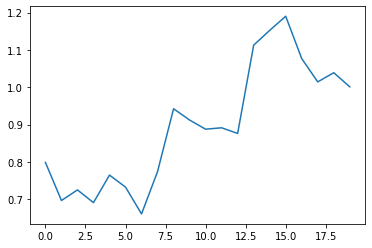

In [10]:
plt.plot(train_ds.samples[0][19][:,3])

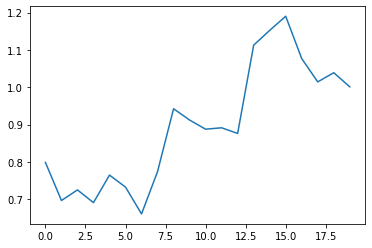

In [18]:
plt.plot(train_cs.samples[0][:20,3])